# Iris flower classification


In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/sample_data/Iris.csv'
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
iris_data.head(), iris_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa
 2   3            4.7           3.2            1.3           0.2  Iris-setosa
 3   4            4.6           3.1            1.5           0.2  Iris-setosa
 4   5            5.0           3.6            1.4           0.2  Iris-setosa,
 None)

###Dataset Overview
The dataset contains 150 rows and 6 columns. The columns include:

###Id:
A unique identifier for each row.
###SepalLengthCm:
Sepal length in centimeters (float).
###SepalWidthCm:
Sepal width in centimeters (float).
###PetalLengthCm:
Petal length in centimeters (float).
###PetalWidthCm:
Petal width in centimeters (float).
###Species:
The target label, representing the flower species
(categorical: Iris-setosa, Iris-versicolor, Iris-virginica).

## Data preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop the Id column
iris_data_cleaned = iris_data.drop(columns=['Id'])

# Encode the target column 'Species' into numerical labels
label_encoder = LabelEncoder()
iris_data_cleaned['Species'] = label_encoder.fit_transform(iris_data_cleaned['Species'])

# Split the data into features (X) and target (y)
X = iris_data_cleaned.drop(columns=['Species'])
y = iris_data_cleaned['Species']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((120, 4), (30, 4), (120,), (30,))

##Exploratory Data Analysis (EDA):

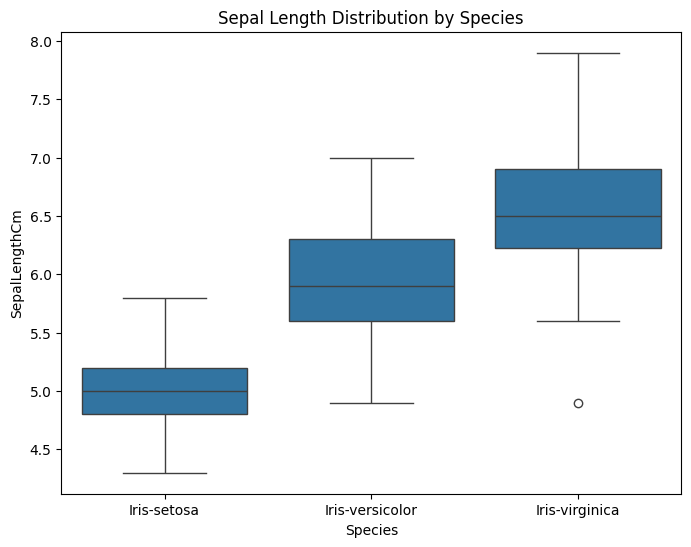

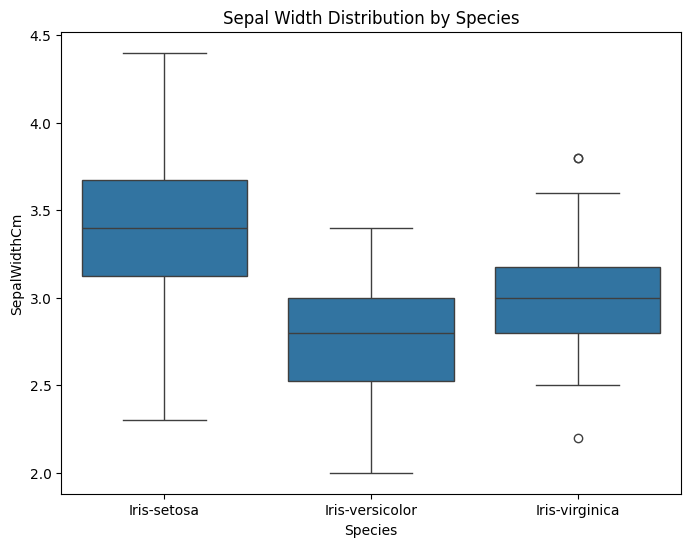

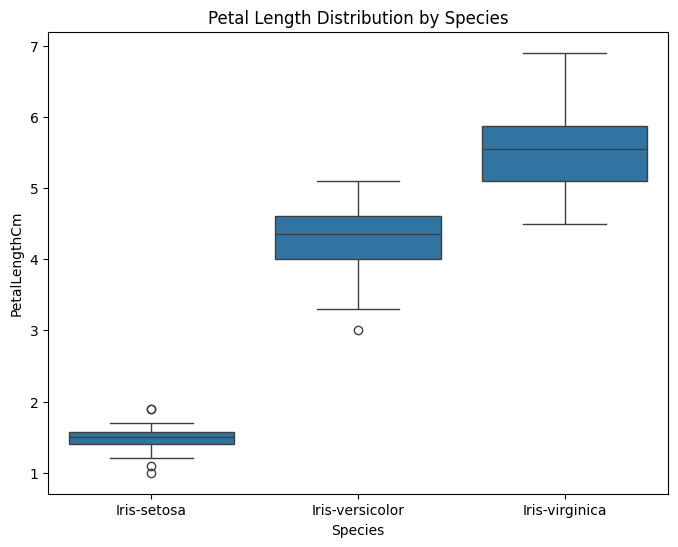

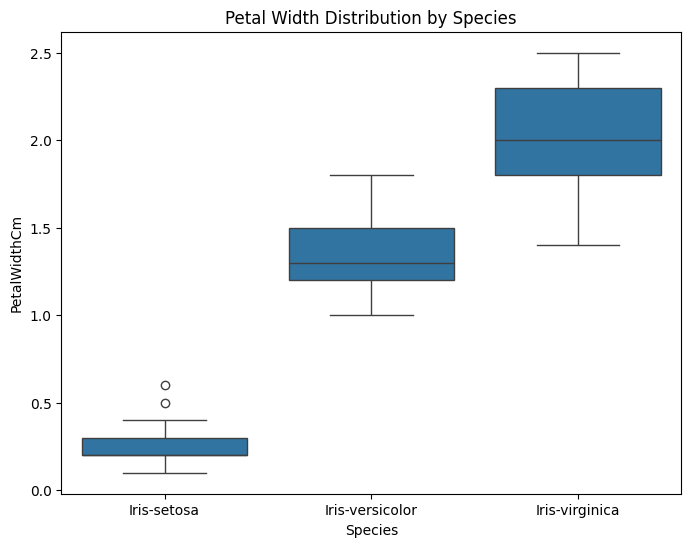

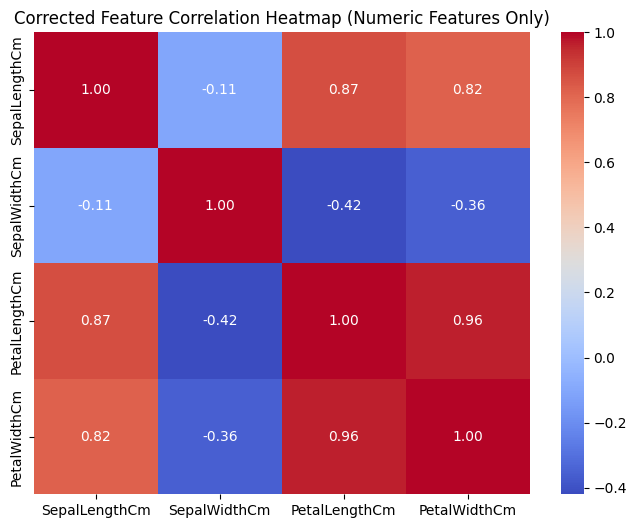

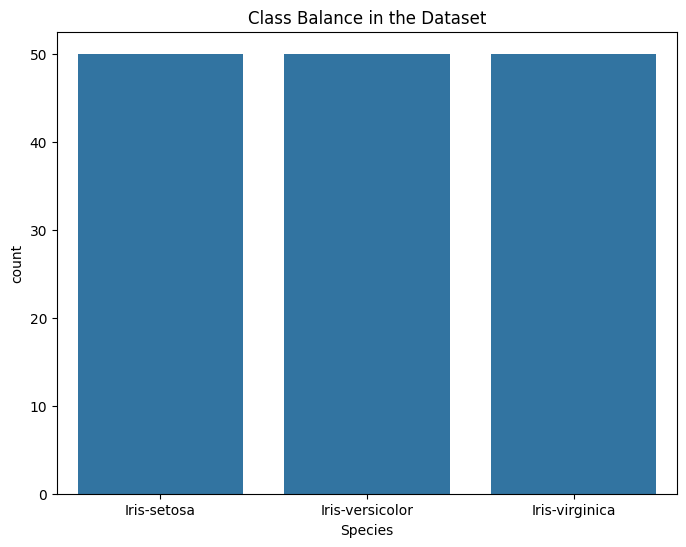

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of measurements for each species
species = iris_data['Species']

# Distribution of Sepal Length by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalLengthCm', data=iris_data)
plt.title('Sepal Length Distribution by Species')
plt.show()

# Distribution of Sepal Width by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='SepalWidthCm', data=iris_data)
plt.title('Sepal Width Distribution by Species')
plt.show()

# Distribution of Petal Length by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalLengthCm', data=iris_data)
plt.title('Petal Length Distribution by Species')
plt.show()

# Distribution of Petal Width by species
plt.figure(figsize=(8, 6))
sns.boxplot(x='Species', y='PetalWidthCm', data=iris_data)
plt.title('Petal Width Distribution by Species')
plt.show()

# Recompute the correlation heatmap, excluding non-numeric columns like 'Species'
numeric_features = iris_data_cleaned.drop(columns=['Species'])
correlation_fixed = numeric_features.corr()

# Plot the corrected heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_fixed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corrected Feature Correlation Heatmap (Numeric Features Only)')
plt.show()


# Class balance visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=iris_data)
plt.title('Class Balance in the Dataset')
plt.show()


## Model training and testing

### Logistic regression and random forest

<Figure size 600x600 with 0 Axes>

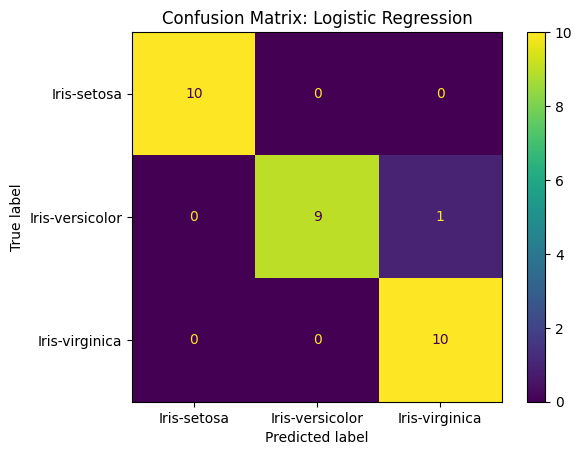

<Figure size 600x600 with 0 Axes>

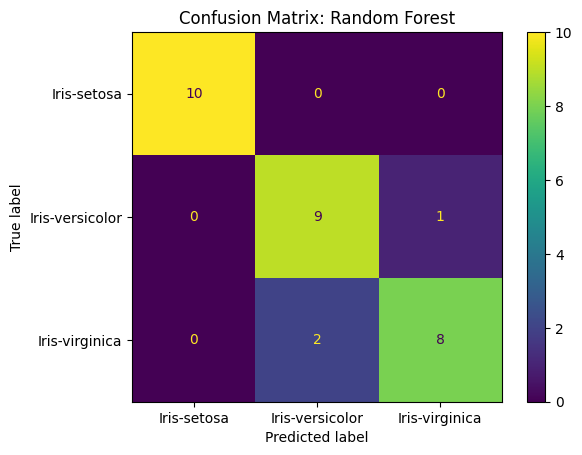

Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



(0.9666666666666667, 0.9)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Initialize the models
logistic_model = LogisticRegression(random_state=42, max_iter=200)
random_forest_model = RandomForestClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions
logistic_preds = logistic_model.predict(X_test)
rf_preds = random_forest_model.predict(X_test)

# Evaluate models
logistic_acc = accuracy_score(y_test, logistic_preds)
rf_acc = accuracy_score(y_test, rf_preds)

# Generate evaluation metrics
logistic_report = classification_report(y_test, logistic_preds, target_names=label_encoder.classes_)
rf_report = classification_report(y_test, rf_preds, target_names=label_encoder.classes_)

# Confusion matrix for Logistic Regression
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, logistic_preds), display_labels=label_encoder.classes_).plot()
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

# Confusion matrix for Random Forest
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_preds), display_labels=label_encoder.classes_).plot()
plt.title("Confusion Matrix: Random Forest")
plt.show()

# Display the classification reports
print("Logistic Regression Classification Report:\n", logistic_report)
print("Random Forest Classification Report:\n", rf_report)

# Display the accuracy scores
(logistic_acc, rf_acc)


### Support vector machine (SVM)

<Figure size 600x600 with 0 Axes>

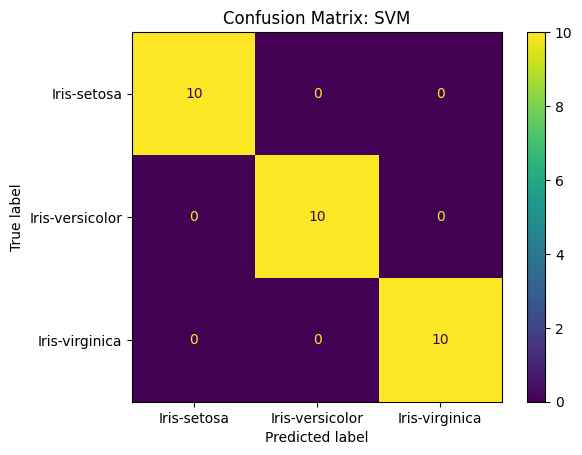

SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



1.0

In [8]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)

# Evaluate the SVM model
svm_acc = accuracy_score(y_test, svm_preds)
svm_report = classification_report(y_test, svm_preds, target_names=label_encoder.classes_)

# Confusion matrix for SVM
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(confusion_matrix(y_test, svm_preds), display_labels=label_encoder.classes_).plot()
plt.title("Confusion Matrix: SVM")
plt.show()

# Display the classification report and accuracy
print("SVM Classification Report:\n", svm_report)
svm_acc


## Model comparison

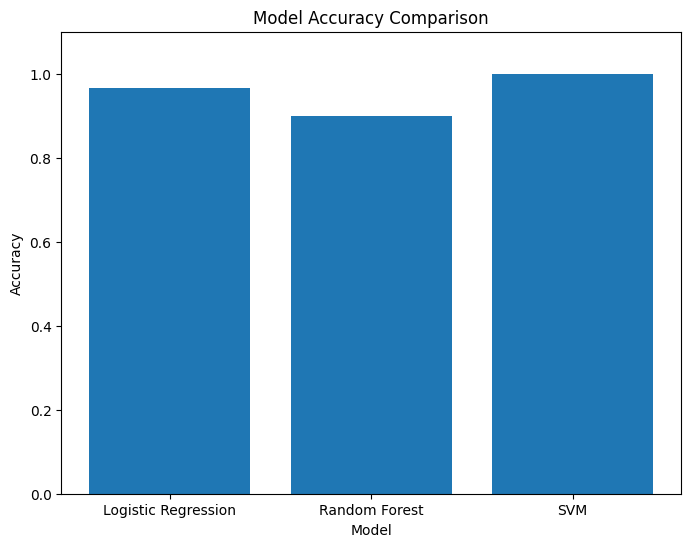

In [9]:
# Prepare accuracy data for comparison
model_accuracies = {
    'Logistic Regression': logistic_acc,
    'Random Forest': rf_acc,
    'SVM': svm_acc
}

# Plot a histogram for accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values())
plt.ylim(0, 1.1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()
